In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#============================= IMPORT LIBRARIES =============================

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#============================= DATA SELECTION ==============================

dataframe=pd.read_csv("m.csv")
print("==============================================")
print("------------------- Input Data ---------------")
print("==============================================")
print()
print(dataframe.head(20))

#============================= PREPROCESSING ==============================

#==== checking missing values ====

print("=======================================================")
print("------------------  Checking Missing Values -------==--")
print("======================================================")
print()
print(dataframe.isnull().sum())


dataframee=dataframe[['# mean_0_a','mean_1_a','mean_2_a','mean_3_a','mean_4_a','label']]


print("-----------------------------------------------------------")
print("================== Before label Encoding ==================")
print("-----------------------------------------------------------")
print()

print(dataframee['label'].head(10))

from sklearn import preprocessing


label_encoder = preprocessing.LabelEncoder()


print("-----------------------------------------------------------")
print("================== After label Encoding ==================")
print("-----------------------------------------------------------")
print()

dataframee['label']= label_encoder.fit_transform(dataframee['label'])

print(dataframee['label'].head(10))

print("-----------------------------------------------------------")
print("=================== Data Splitting  =======================")
print("-----------------------------------------------------------")
print()

X = dataframee.drop('label', axis = 1)
y = dataframee['label']


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print("The total No.of original data:",X.shape[0] )
print()
print("The total No.of Test data:",X_test.shape[0] )
print()
print("The total No.of Train data:",X_train.shape[0] )
print()

print("-----------------------------------------------------------")
print("================== Random Forest   ========================")
print("-----------------------------------------------------------")
print()

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, model.predict(X_test))
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")
print()

import pickle
pickle.dump(model, open('eeg.pkl', 'wb'))


------------------- Input Data ---------------

    # mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
0        4.620      30.3   -356.00     15.60      26.3      1.0700   
1       28.800      33.1     32.00     25.80      22.8      6.5500   
2        8.900      29.4   -416.00     16.70      23.7     79.9000   
3       14.900      31.6   -143.00     19.80      24.3     -0.5840   
4       28.300      31.3     45.20     27.30      24.5     34.8000   
5       31.000      30.9     29.60     28.50      24.0      1.6500   
6       10.800      21.0     44.70      4.87      28.1      2.1400   
7       17.800      27.8   -102.00     16.90      26.9     -3.2100   
8       11.500      29.7     34.90     10.20      26.9    -38.0000   
9        8.910      29.2   -314.00      6.51      30.9     -1.8800   
10       5.210      28.4     18.50      3.66      22.6     -0.1190   
11      13.300      30.4   -149.00     11.80      28.3      3.0300   
12      30.100      32.7     29.40     28.

In [46]:

from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, model.predict(X_test))
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test))*100,2)}")
print()
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,model.predict(X_test))
print("The MSE value is",mse)
import numpy as np
rmse=np.sqrt(mse)
print(" The MAE value is",metrics.mean_absolute_error(y_test,model.predict(X_test)))
print("The RMSE Value is",rmse)


      
      

Accuracy is 97.89

The MSE value is 0.0702576112412178
 The MAE value is 0.03747072599531616
The RMSE Value is 0.2650615235020311


In [47]:
print("-----------------------------------------------------------")
print("========================== CNN   ===========================")
print("-----------------------------------------------------------")
print()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Input
inp =  Input(shape=(5,1))
conv = Conv1D(filters=2, kernel_size=2)(inp)
pool = MaxPool1D(pool_size=2)(conv)
flat = Flatten()(pool)
dense = Dense(1)(flat)
model = Model(inp, dense)
model.compile(loss='mae', optimizer='adam',metrics=['mse','mae','accuracy'])

x=np.expand_dims(X_train, axis=2)
Y=np.expand_dims(y_train,axis=1)

print(model.summary())
history = model.fit(x, Y, epochs=5, batch_size=200, verbose=1, shuffle=False)

-----------------------------------------------------------
========================== CNN   ===========================
-----------------------------------------------------------

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 5, 1)]            0         
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 4, 2)              6         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 2, 2)              0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 4)                 0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 11
Trainable params: 11
Non-trainable params: 0
____________

In [55]:
cnn_mse=model.evaluate(x,Y,verbose=1)[1]
print("The MSE Value is ",cnn_mse)
print()
cnn_mae=model.evaluate(x,Y,verbose=1)[0]
print("The MAE Value is ",cnn_mae)
print()
cnn_acc=model.evaluate(x,Y,verbose=1)[3]
print("The Accuracy Value is ",cnn_acc )
print()

54/54 [==============================] - 0s 981us/step - loss: 84.2377 - mse: 20401.0020 - mae: 84.2377 - accuracy: 0.0082
The MSE Value is  20401.001953125

54/54 [==============================] - 0s 849us/step - loss: 84.2377 - mse: 20401.0020 - mae: 84.2377 - accuracy: 0.0082
The MAE Value is  84.2376937866211

54/54 [==============================] - 0s 849us/step - loss: 84.2377 - mse: 20401.0020 - mae: 84.2377 - accuracy: 0.0082
The Accuracy Value is  0.00821114331483841



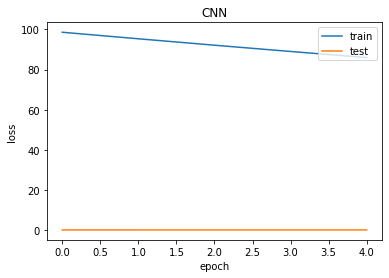

In [58]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()
